### Feature Scaling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./Data/Social_Network_Ads.csv")

In [6]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
221,15663161,Male,35,91000,1
33,15776733,Female,28,44000,0
100,15766289,Male,27,88000,0
323,15619465,Female,48,30000,1
58,15642885,Male,22,18000,0


In [7]:
df = df.drop(columns=["User ID", "Gender"])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1),df["Purchased"], test_size=0.3)

In [9]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# mean value for 2 columns
scaler.mean_

array([3.70107143e+01, 6.79964286e+04])

In [12]:
# now after scaling this returns numpy array

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
49,0.971408,-1.017674
164,-1.070737,-1.077544
257,-0.001042,-0.329175
236,-0.098287,-0.538718
141,0.971408,-0.628523


## Data before scaling

In [14]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.0,67996.4
std,10.3,33465.8
min,18.0,15000.0
25%,29.0,43000.0
50%,36.0,65000.0
75%,43.2,86000.0
max,60.0,150000.0


## Data after scaling

In [15]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.7
50%,-0.1,-0.1
75%,0.6,0.5
max,2.2,2.5


## Visualizing

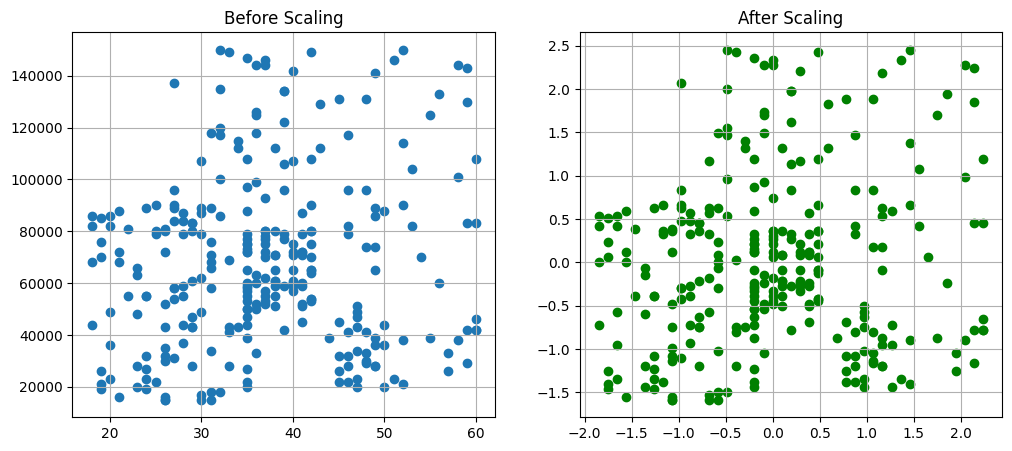

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax1.grid(True)

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="green")
ax2.set_title("After Scaling")
ax2.grid(True)

plt.show()

## Visualizing Density Function after and before scaling

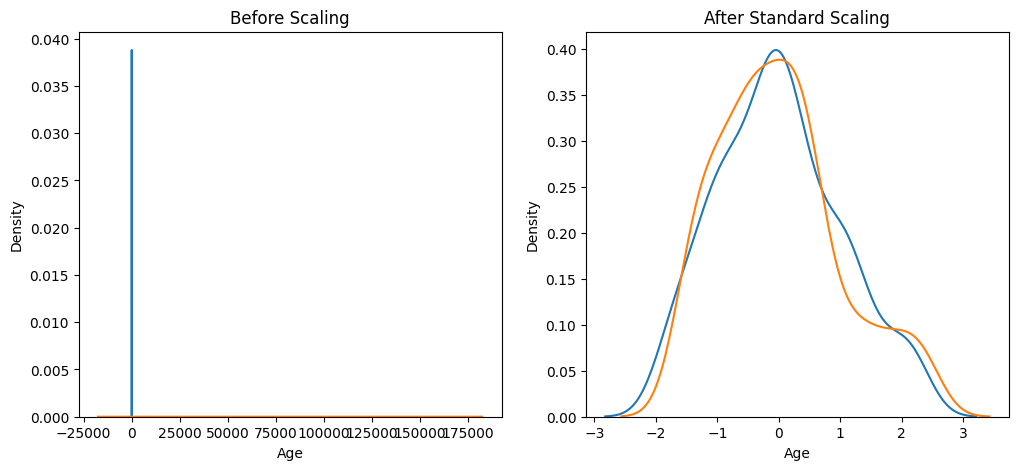

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

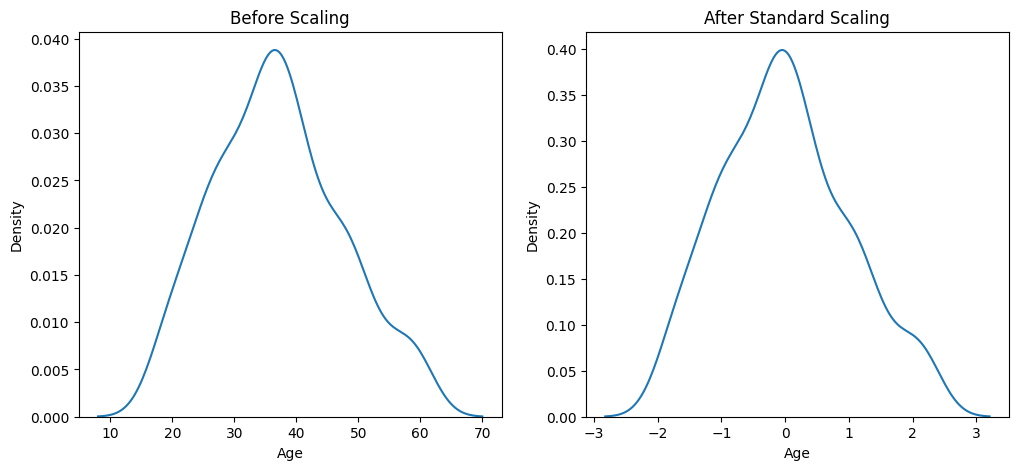

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
# sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
# sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

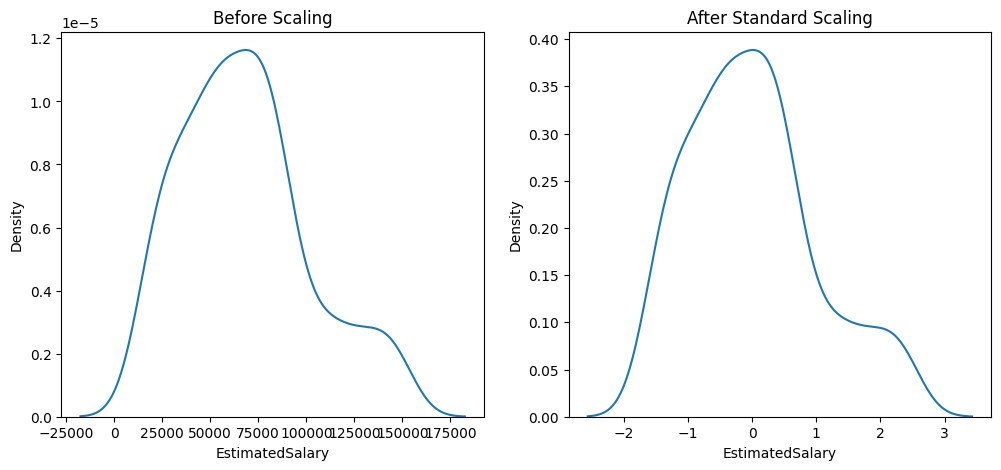

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
# sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
# sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

## Normalization

It is a technique often applied as part of data preparation for machine learning.

The goal of normalization is to change the values of numeric columns in the  dataset to use a common scale without distorting differences in the ranges of values or losing information.

Xi = ( Xi - Xmin ) / ( Xmax - Xmin )

In [20]:
from sklearn.preprocessing import MinMaxScaler

# scaler instance
min_max_scaler = MinMaxScaler()


min_max_scaler.fit(X_train)

X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

In [21]:
X_train_min_max_scaled = pd.DataFrame(X_train_min_max_scaled, columns=X_train.columns)
X_test_min_max_scaled = pd.DataFrame(X_test_min_max_scaled, columns=X_train.columns)

In [22]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.0,67996.4
std,10.3,33465.8
min,18.0,15000.0
25%,29.0,43000.0
50%,36.0,65000.0
75%,43.2,86000.0
max,60.0,150000.0


In [23]:
np.round(X_train_min_max_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.4,0.4
75%,0.6,0.5
max,1.0,1.0


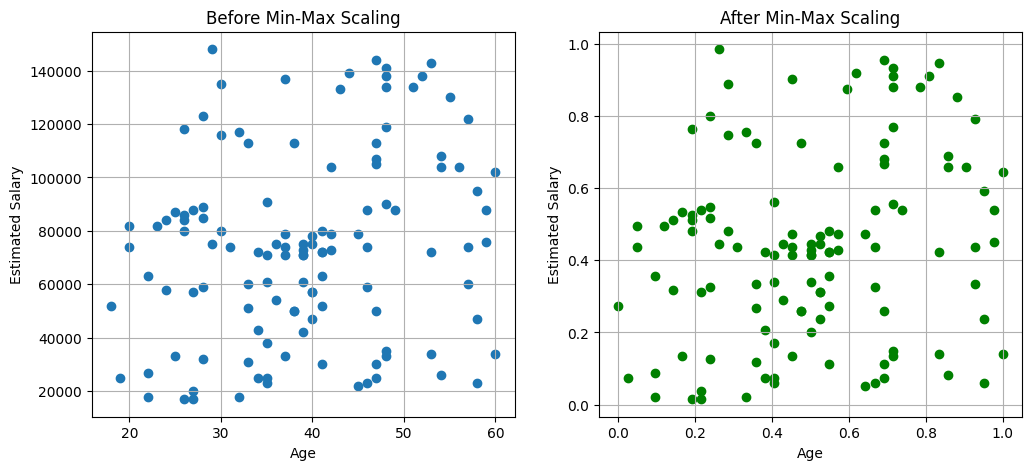

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before Min-Max scaling
ax1.scatter(X_test["Age"], X_test["EstimatedSalary"])
ax1.set_title("Before Min-Max Scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")
ax1.grid(True)

# Scatter plot after Min-Max scaling
ax2.scatter(X_test_min_max_scaled["Age"], X_test_min_max_scaled["EstimatedSalary"], color="green")
ax2.set_title("After Min-Max Scaling")
ax2.set_xlabel("Age")
ax2.set_ylabel("Estimated Salary")
ax2.grid(True)

plt.show()

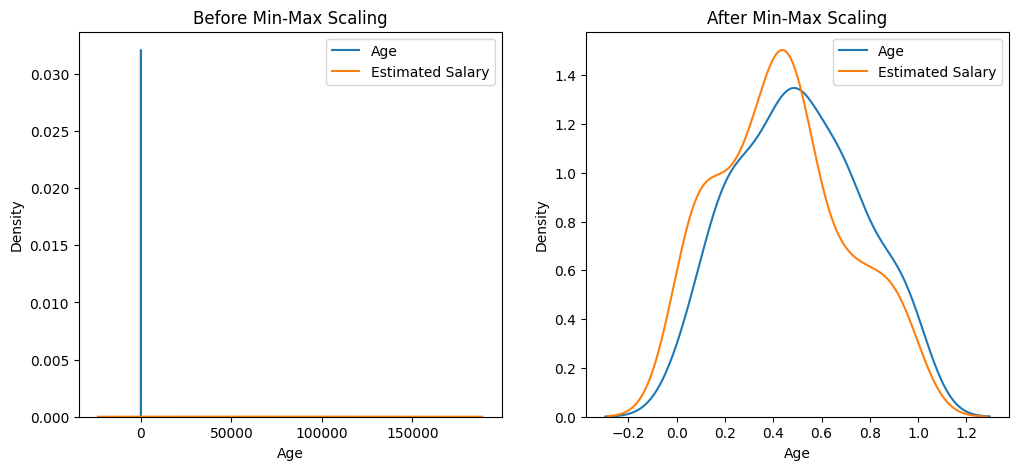

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# KDE plot before Min-Max scaling
ax1.set_title("Before Min-Max Scaling")
sns.kdeplot(X_test["Age"], ax=ax1, label="Age")
sns.kdeplot(X_test["EstimatedSalary"], ax=ax1, label="Estimated Salary")
ax1.legend()

# KDE plot after Min-Max scaling
ax2.set_title("After Min-Max Scaling")
sns.kdeplot(X_test_min_max_scaled["Age"], ax=ax2, label="Age")
sns.kdeplot(X_test_min_max_scaled["EstimatedSalary"], ax=ax2, label="Estimated Salary")
ax2.legend()

plt.show()